#### Case 1: Isobaric evaporation of liquid hydrogen in a 4.89 $m^3$ spherical tank experiments.

This notebook sets up the isobaric evaporation of liquid hydrogen ($LH_2$) in a 4.89 $m^3$ storage tank. A high liquid filling, high heat ingress scenario from Hasan (1991) is considered. This tank is representative of lab-scale tanks used for cryogen evaporation experiments that measure boil-off rates and thermal stratification.

In [1]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

from scipy.integrate import simps

from mpltools import annotation

#### Setup tank and cryogen properties

In [2]:
# LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 2.106 # Internal diameter / m
d_o = 2.106+2.08e-3   # External diameter / m
T_air = 350 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.01063 # W/m2/K
U_V = 0.01063 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, 

# Spherical tank volume
V_tank = 4.89 #m^3

# Initial liquid filling / Dimensionless
LF = 0.50

# Specify tank operating pressure
P = 117e3 # Pa

Geo_v1 = "spherical"
Geo_l1 = "spherical"

Geo_v2 = "cylindrical"
Geo_l2 = "cylindrical"

# Initialize large-scale tank
small_tank1 = Tank(d_i, d_o, V_tank, Geo_v1, Geo_l1,LF)
small_tank1.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w = 0.8)

small_tank2 = Tank(d_i, d_o, V_tank, Geo_v2, Geo_l2,LF)
small_tank2.set_HeatTransProps(U_L, U_V, T_air, Q_b_fixed=None, Q_roof=Q_roof, eta_w = 0.8)

# Initialise cryogen
hydrogen1 = Cryogen(name = "hydrogen")
hydrogen1.set_coolprops(P)

hydrogen2 = Cryogen(name='hydrogen')
hydrogen2.set_coolprops(P)

# Set cryogen
small_tank1.cryogen = hydrogen1
small_tank2.cryogen = hydrogen2

# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))
print("The initial evaporation rate of " + hydrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

The initial evaporation rate of hydrogen is 3.5e-01 kg/h
The initial evaporation rate of hydrogen is 4.1e-01 kg/h


Calculate initial evaporation rate and transient period

In [3]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank1.tau)

# Minimum number of hours to achieve steady state 
tau_h1 = (np.floor(small_tank1.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h1 )

# Calculate boil-off rate
BOR1 = (small_tank1.b_l_dot * 24 * 3600) / (small_tank1.V * small_tank1.LF * small_tank1.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR1 * 100))
print('Area = ',small_tank1.A_T)
print("vz at t=0 = ", small_tank1.v_z,'\n')

# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank2.tau)

# Minimum number of hours to achieve steady state 
tau_h2 = (np.floor(small_tank2.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h2 )

# Calculate boil-off rate
BOR2 = (small_tank2.b_l_dot * 24 * 3600) / (small_tank2.V * small_tank2.LF * small_tank2.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR2 * 100))
print('Area = ',small_tank2.A_T)
print("vz at t=0 = ", small_tank2.v_z)

The initial evaporation rate of hydrogen is 3.5e-01 kg/h
Transient period = 56500.593 s 
Simulation time: 16 h
BOR = 4.954 %
Area =  3.483426174104408
vz at t=0 =  1.8638827916261786e-05 

The initial evaporation rate of hydrogen is 4.1e-01 kg/h
Transient period = 32313.811 s 
Simulation time: 9 h
BOR = 5.773 %
Area =  3.4834262086342447
vz at t=0 =  2.1721212878630252e-05


#### Simulation setup and execution

In [4]:
# Define vertical spacing
dz = 0.005*5

# Calculate number of nodes
n_z = 1 + int(np.round(small_tank1.l_V/dz, 0))

# Define dimensionless computational grid
small_tank1.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
small_tank1.U_roof = 0

# Define evaporation time as twice as the transient period
#evap_time = 3600 *tau_h1*2
evap_time = 3600*40

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank1.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank1.plot_interval = evap_time/6

# Simulate the evaporation
small_tank1.evaporate(evap_time)

# Calculate number of nodes
n_z2 = 1 + int(np.round(small_tank2.l_V/dz, 0))

# Define dimensionless computational grid
small_tank2.z_grid = np.linspace(0, 1, n_z2)

# Insulated roof
small_tank2.U_roof = 0

# Define evaporation time as twice as the transient period
#evap_time = 3600 *tau_h1*2
evap_time = 3600*40

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank2.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank2.plot_interval = evap_time/6

# Simulate the evaporation
small_tank2.evaporate(evap_time)

/home/aeb23/IRP/CryoEvap/notebooks/../cryoevap/storage_tanks/tank.py:498: RuntimeWarning: divide by zero encountered in divide
  vz = self.v_z*(l_L[i]/zed)*(2*self.d_i/2 - l_L[i])/(2*self.d_i/2 - zed)


#### Visualisation of results

#### Vapour temperature

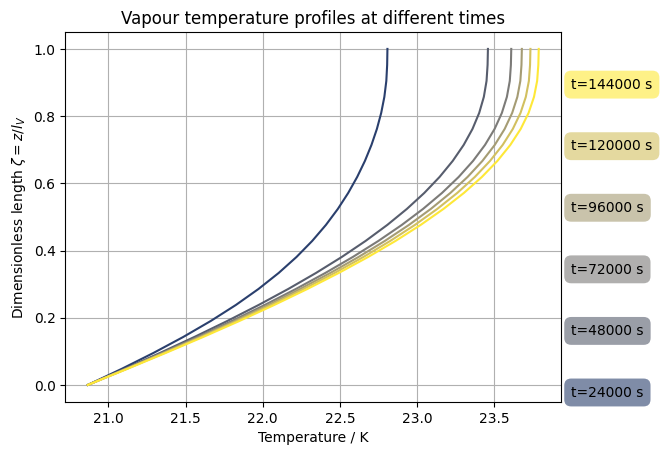

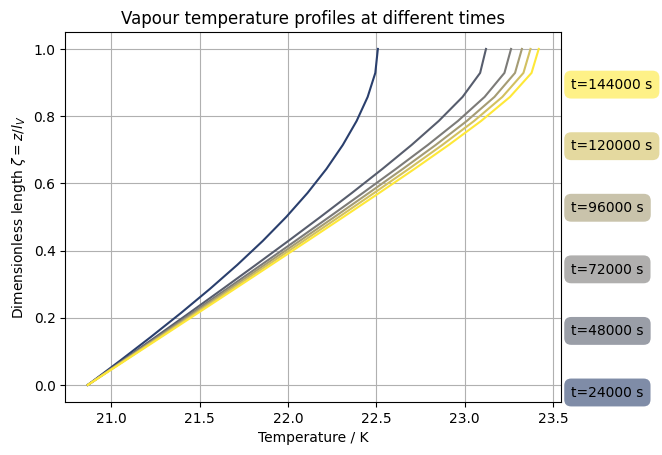

In [5]:
# Visualise the plot
small_tank1.plot_tv()
#plt.ylim((0,0.3))
#plt.xlim((20.86,21))
small_tank2.plot_tv()
#plt.xlim((20.86,21))

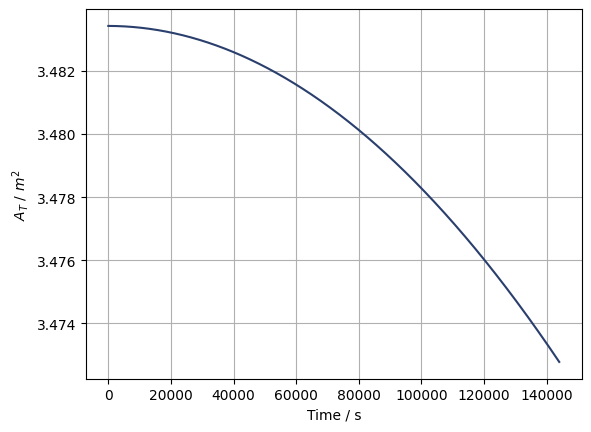

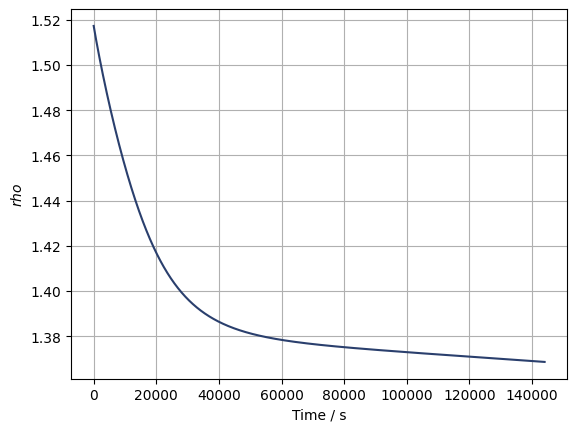

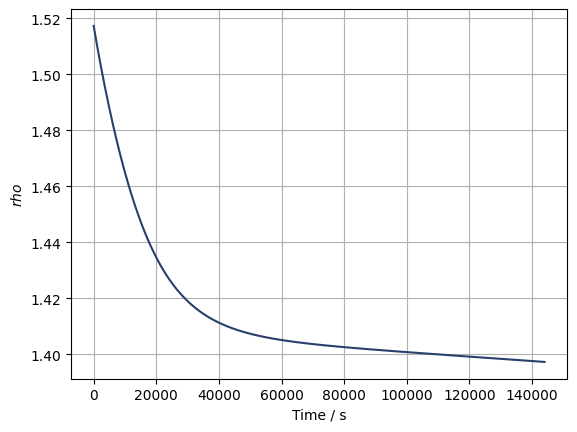

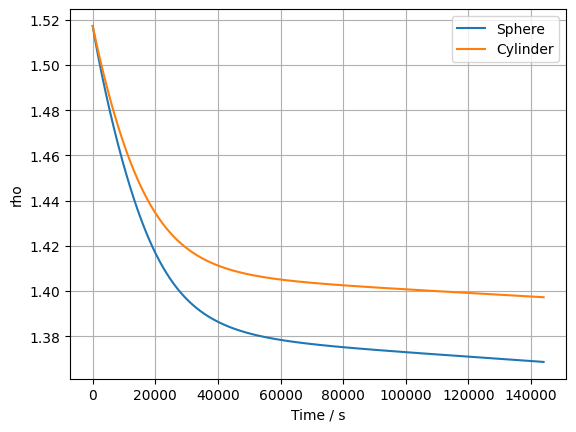

In [6]:
small_tank1.plot_A_T()
small_tank1.plot_rho_V_avg()
small_tank2.plot_rho_V_avg()
plt.plot(small_tank1.data['Time'],small_tank1.data['rho_V_avg'],small_tank2.data['Time'],small_tank2.data['rho_V_avg'])
plt.legend(['Sphere','Cylinder'])
plt.xlabel('Time / s')
plt.ylabel('rho')
plt.grid(True)

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

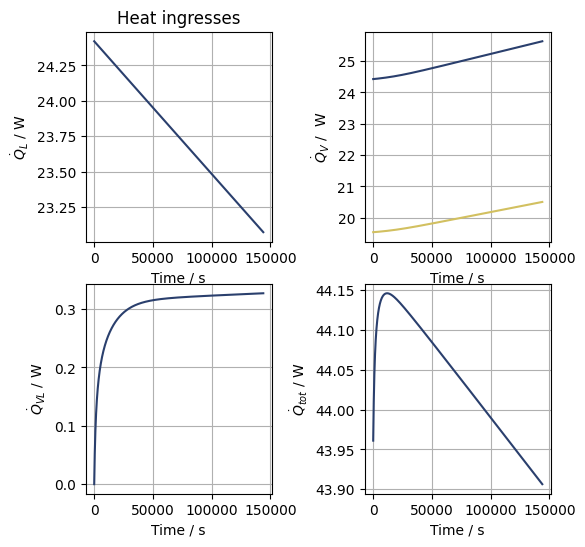

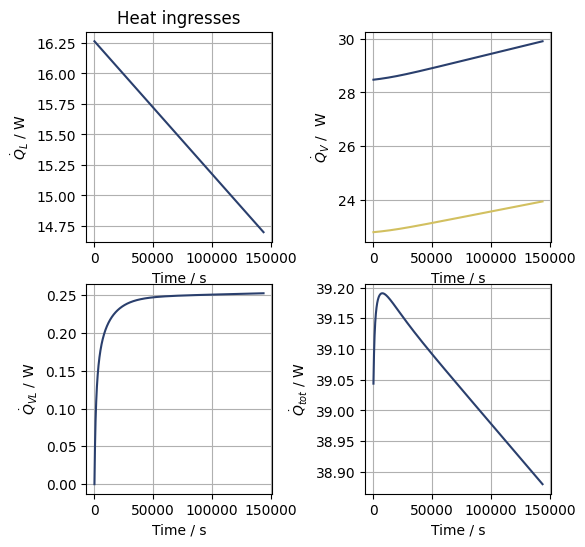

In [7]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_Q(unit="W")
small_tank2.plot_Q(unit='W')

#### Plot liquid volume

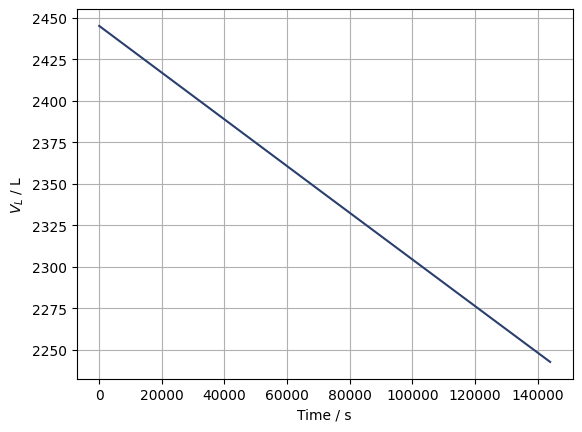

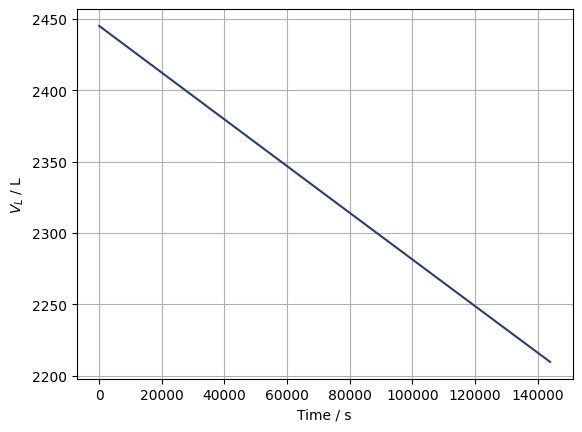

Text(0, 0.5, '$V_L$ / $m^3$')

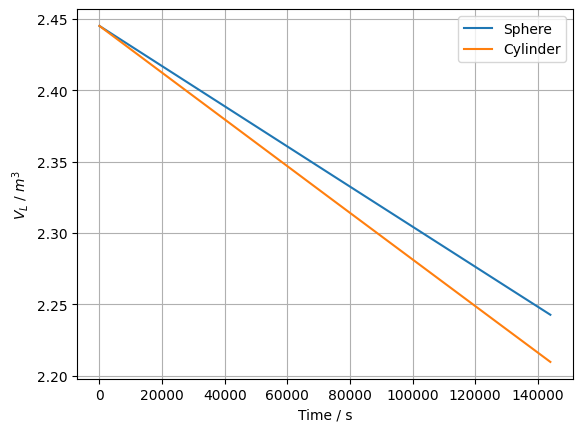

In [8]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_V_L(unit="L")
small_tank2.plot_V_L(unit='L')
plt.plot(small_tank1.data['Time'],small_tank1.data['V_L'],small_tank2.data['Time'],small_tank2.data['V_L'])
plt.grid(True)
plt.legend(['Sphere','Cylinder'])
plt.xlabel('Time / s')
plt.ylabel('$V_L$ / $m^3$')

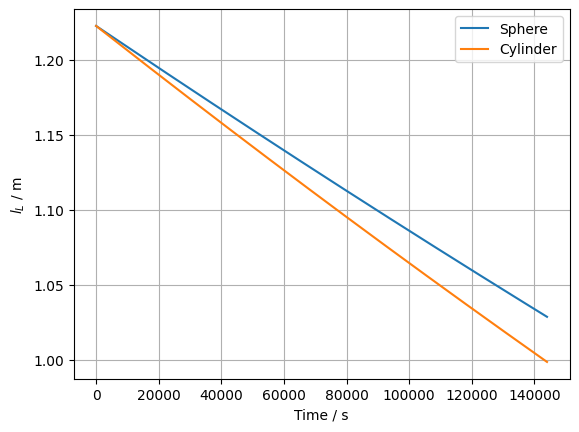

In [9]:
plt.plot(small_tank1.data['Time'],small_tank1.data['V_L']*small_tank1.data['LF'],small_tank2.data['Time'],small_tank2.data['V_L']*small_tank2.data['LF'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$l_L$ / m')
plt.legend(['Sphere','Cylinder'])

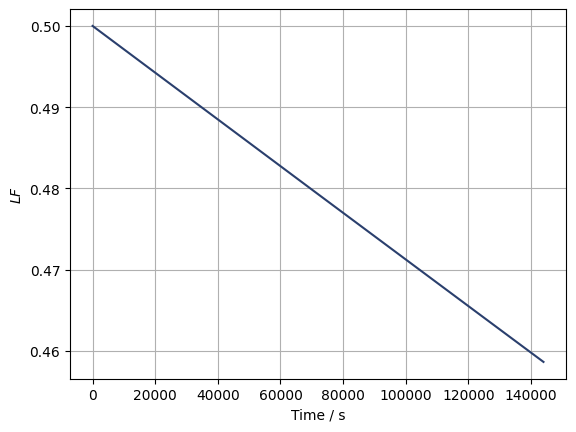

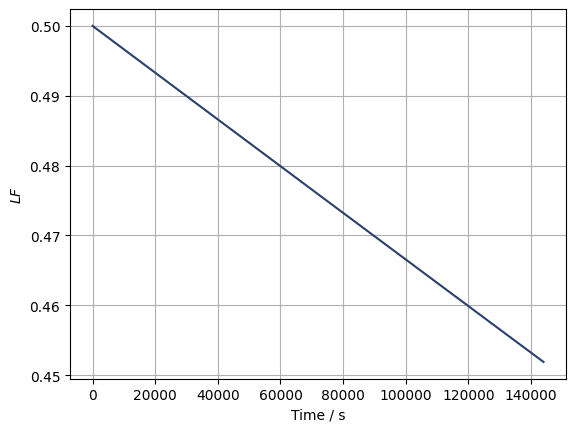

Text(0, 0.5, 'LF')

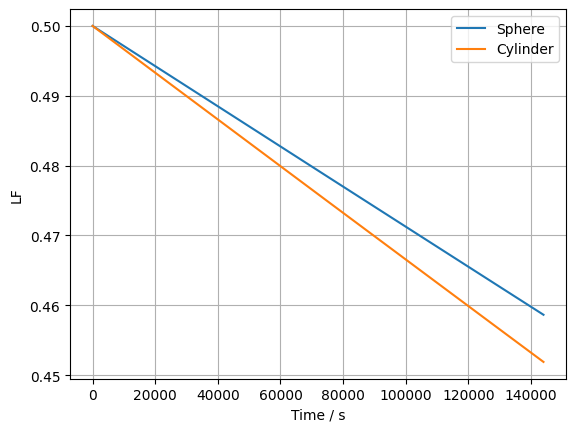

In [10]:
small_tank1.plot_LF()
small_tank2.plot_LF()
plt.plot(small_tank1.data['Time'],small_tank1.data['LF'],small_tank2.data['Time'],small_tank2.data['LF'])
plt.legend(['Sphere','Cylinder'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('LF')

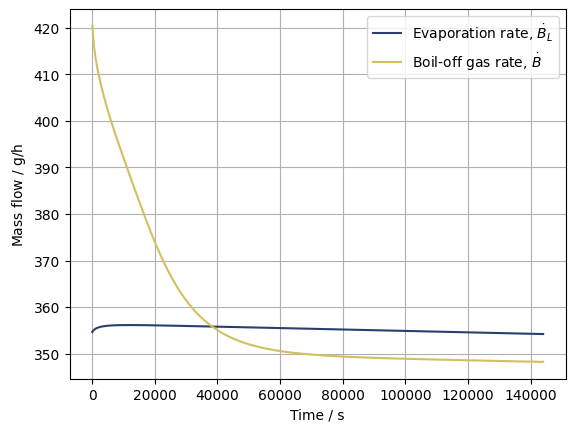

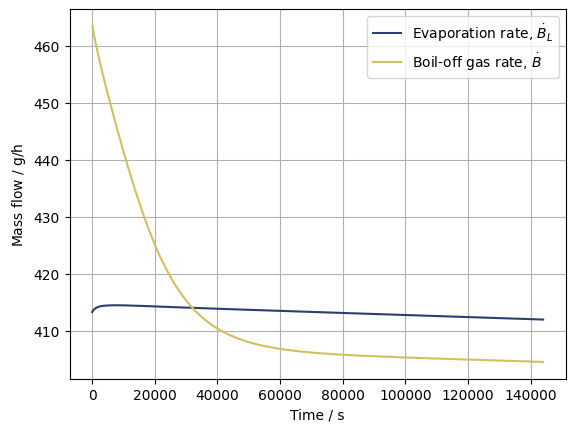

In [11]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_BOG(unit='g/h')
small_tank2.plot_BOG(unit='g/h')

/home/aeb23/IRP/CryoEvap/notebooks/../cryoevap/storage_tanks/plots.py:251: RuntimeWarning: divide by zero encountered in divide
  v_z = tank.v_z*(height/zed)*(2*tank.d_i/2 - height)/(2*tank.d_i/2 - zed)


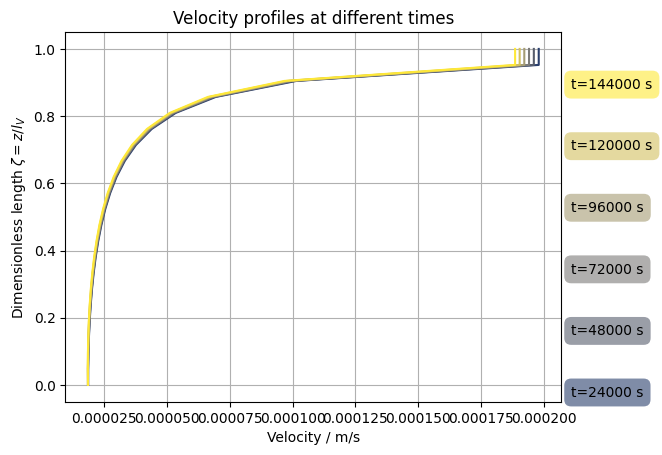

In [12]:
small_tank1.plot_vz()

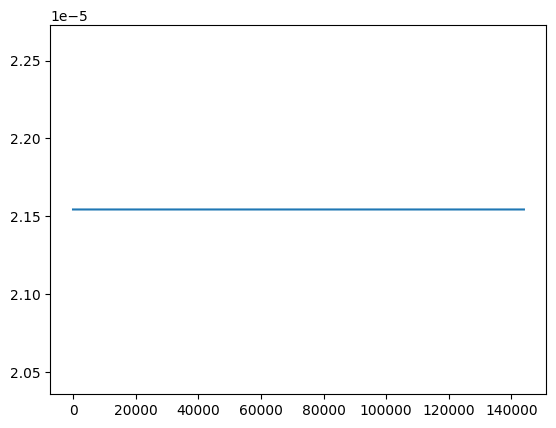

In [13]:
plt.plot(small_tank2.data['Time'],small_tank2.data['vz'])

In [14]:
small_tank1.data["Pressure"] = np.ones_like(small_tank1.data["B_L"])*P
air = P*(V_tank*(1-LF))/(8.314*hydrogen1.T_sat)
for i in range(1,len(small_tank1.data["B_L"])):
    small_tank1.data["Pressure"][i] = ((simps(small_tank1.data["B_L"][:i])*(1000/2) +air)*8.314*small_tank1.data["Tv_avg"][i])/(V_tank - small_tank1.data["V_L"][i])

Optional: CSV data export

If evaporation data is intended to be post-processed in another software, it can be exported readily with the help of the Pandas package.

In [15]:
# Import pandas 
import pandas as pd

In [16]:
# Create dataframe from dictionary
df_evap = pd.DataFrame.from_dict(small_tank1.data)
df_evap2 = pd.DataFrame.from_dict(small_tank2.data)
# Save file to the current working directory
df_evap.to_csv('LN2_small_m3.csv')

In [17]:
df_evap['flux_v'] = df_evap["Q_V"]/(np.pi*d_i*(d_i-df_evap['z']))
df_evap['flux_l'] = df_evap["Q_L"]/(np.pi*d_i*(df_evap['z']))
df_evap['total_flux'] = (df_evap['Q_L']+df_evap['Q_V'])/(np.pi*d_i**2)

In [18]:
df_evap["SCHM BOG"] = ((df_evap["BOG"]*1000*3600/2)*(273+15)*8.314)/101325
df_evap2["SCHM BOG"] = ((df_evap2["BOG"]*1000*3600/2)*(273+15)*8.314)/101325
df_evap[-5:]

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,vz_avg,vz,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux,SCHM BOG
2396,143760,22.659439,1.368697,0.327002,23.076322,25.629365,2.243109,0.000098,0.000097,-9.628665e-08,...,0.00003,0.000019,0.458714,0.000001,20.503492,125775.146993,3.486327,3.505809,3.495530,4.114538
2397,143820,22.659521,1.368691,0.327007,23.075762,25.629916,2.243025,0.000098,0.000097,-9.651185e-08,...,0.00003,0.000019,0.458696,0.000001,20.503932,125775.111399,3.486326,3.505809,3.495530,4.114554
2398,143880,22.659602,1.368685,0.327012,23.075201,25.630467,2.242941,0.000098,0.000097,-9.553183e-08,...,0.00003,0.000019,0.458679,0.000001,20.504373,125775.067203,3.486325,3.505809,3.495529,4.114433
2399,143940,22.659682,1.368680,0.327017,23.074641,25.631018,2.242857,0.000098,0.000097,-9.640843e-08,...,0.00003,0.000019,0.458662,0.000001,20.504814,125775.021701,3.486324,3.505809,3.495528,4.114522
2400,144000,22.659764,1.368674,0.327023,23.074080,25.631569,2.242773,0.000098,0.000097,-9.842488e-08,...,0.00003,0.000019,0.458645,0.000001,20.505255,125774.986498,3.486323,3.505809,3.495528,4.114739


In [19]:
df_evap2.columns

Index(['Time', 'Tv_avg', 'rho_V_avg', 'Q_VL', 'Q_L', 'Q_V', 'V_L', 'B_L',
       'BOG', 'drho_V_avg', 'dV_L', 'z', 'vz', 'LF', 'dTV_avg', 'Q_Vw',
       'SCHM BOG'],
      dtype='object')

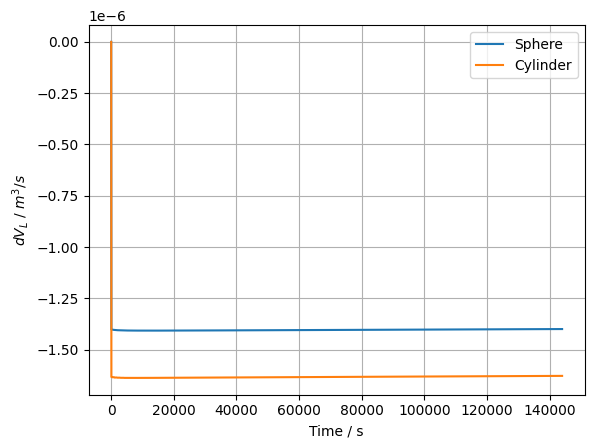

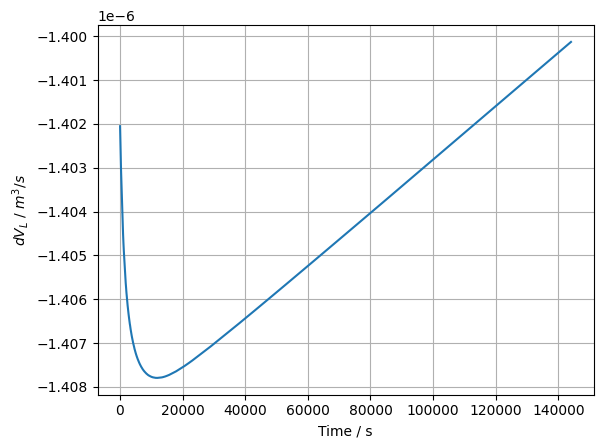

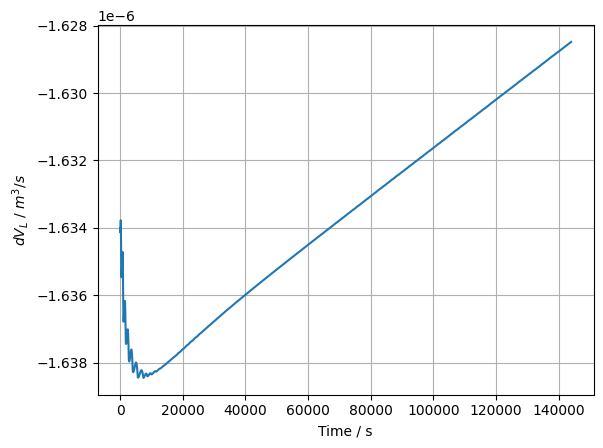

In [20]:
plt.plot(df_evap['Time'],df_evap['dV_L'],df_evap2['Time'],df_evap2['dV_L'])
plt.legend(['Sphere','Cylinder'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.figure()
plt.plot(df_evap['Time'][1:],df_evap['dV_L'][1:])
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.grid(True)
plt.figure()
plt.plot(df_evap2['Time'][1:],df_evap2['dV_L'][1:])
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.grid(True)

In [21]:
assert(df_evap['Time']==df_evap2['Time']).all()

Text(0, 0.5, '$dT_{v, avg}$ / K/s')

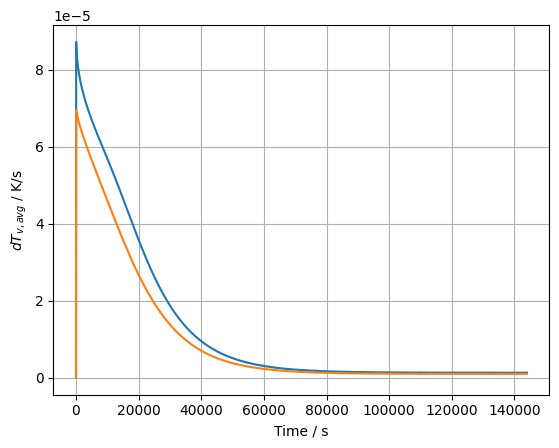

In [22]:
plt.plot(df_evap['Time'],df_evap['dTV_avg'])
plt.plot(df_evap2['Time'],df_evap2['dTV_avg'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$dT_{v, avg}$ / K/s')

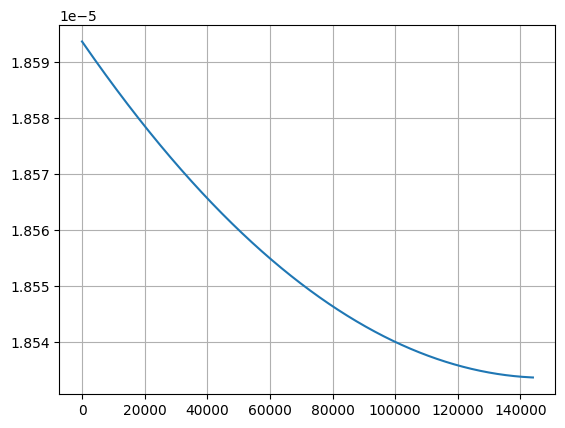

In [23]:
plt.plot(small_tank1.data['Time'],small_tank1.data['vz'])
plt.grid(True)

In [24]:
print(df_evap['vz'][len(small_tank1.data['Time'])-1])
print(df_evap['z'][len(small_tank1.data['Time'])-1])
print(df_evap['vz'][0])
print(df_evap['z'][0])

1.8533662006412613e-05
0.9947819072394702
1.859368075307941e-05
1.0528951611314339


#### References



Hasan, M., Lin, C. and Van Dresar, N. (1991). Self-Pressurization of a Flightweight Liquid Hydrogen Storage Tank Subjected to Low Heat Flux. [online] Available at: https://ntrs.nasa.gov/api/citations/19910011011/downloads/19910011011.pdf [Accessed 2 Jul. 2024].

Wang, Z. and Mérida, W. (2024). Thermal performance of cylindrical and spherical liquid hydrogen tanks. International Journal of Hydrogen Energy, 53, pp.667–683. doi:https://doi.org/10.1016/j.ijhydene.2023.11.287.